In [21]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [22]:
path = '/content/drive/MyDrive/To be uploaded/LDS6/Exam3/Data/penbased-5an-nn.csv'
df = pd.read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
1,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
2,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
3,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
4,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,86,100,38,80,12,51,0,18,94,0,100,13,62,30,7,18,6
10988,0,92,48,100,76,74,70,41,57,9,38,0,46,80,100,20,7
10989,0,82,26,98,59,100,67,78,55,53,49,27,65,6,15,0,2
10990,5,90,55,100,78,84,90,65,71,51,100,23,52,5,0,0,3


In [23]:
def visualize(iloc):
  data = list(df.iloc[iloc])
  i=-1
  list1=[]
  list2 = []
  while i < 16:
    if (i+1)%4 == 0:
      list2.append(list1)
      list1 = []
      list1.append(data[i])
      i+=1
      continue
    list1.append(data[i])
    i+=1

  del list2[0]
  return np.array(list2)

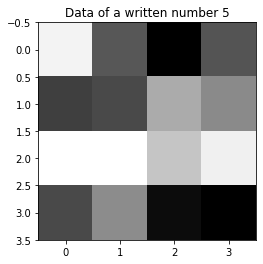

In [24]:
#visualize a random row of data (i)
import matplotlib.pyplot as plt
i = 123
plt.imshow(visualize(i), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Data of a written number {df[16].iloc[i]}")
plt.savefig("a random row of data.pdf", format="pdf")
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns[0:-1]] = scaler.fit_transform(df[df.columns[0:-1]])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.75,0.50,0.51,0.28,0.25,0.16,0.00,1
1,0.99,0.80,0.63,1.00,0.25,0.76,0.79,0.68,1.00,0.62,0.97,0.23,0.54,0.00,0.00,0.16,9
2,0.00,0.73,0.19,0.99,0.72,1.00,0.70,0.73,0.32,0.48,0.05,0.18,0.46,0.00,1.00,0.72,2
3,0.12,0.77,0.20,0.62,0.78,0.40,0.50,0.00,0.01,0.17,0.00,0.64,0.23,0.98,1.00,1.00,5
4,0.00,0.98,0.36,0.42,0.80,0.85,0.68,0.42,0.56,0.00,0.25,0.23,0.50,0.37,1.00,0.32,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0.86,1.00,0.38,0.80,0.12,0.51,0.00,0.18,0.94,0.00,1.00,0.13,0.62,0.30,0.07,0.18,6
10988,0.00,0.92,0.48,1.00,0.76,0.74,0.70,0.41,0.57,0.09,0.38,0.00,0.46,0.80,1.00,0.20,7
10989,0.00,0.82,0.26,0.98,0.59,1.00,0.67,0.78,0.55,0.53,0.49,0.27,0.65,0.06,0.15,0.00,2
10990,0.05,0.90,0.55,1.00,0.78,0.84,0.90,0.65,0.71,0.51,1.00,0.23,0.52,0.05,0.00,0.00,3


In [14]:
X = np.array(df[df.columns[0:-1]])
y = np.array(df[df.columns[-1]])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
algorithm = [
             LogisticRegression(), 
             MultinomialNB(), 
             KNeighborsClassifier(n_neighbors=3), 
             DecisionTreeClassifier(), 
             RandomForestClassifier(n_estimators=300), 
             SVC(kernel='rbf')
             ]

In [16]:
logistic = {'C': [0.01, 0.05, 0.1, 0.5, 1.0],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
multi = {'alpha': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]}
knn = {'n_neighbors': [2, 3, 4, 5, 6]}
decissiontree = {'max_depth': [2, 3, 4, 5, 6, 7],
                 'criterion': ['gini', 'entropy'],
                 'max_features': ['auto', 'sqrt', 'log2']}
randomforest = {'n_estimators': [5, 10, 20, 40, 80, 200],
                'criterion': ['gini', 'entropy'],
                'max_depth': [3, 4, 5, 6, 7, 8],
                'max_features': ['auto', 'sqrt', 'log2']}
svc = {'C': [0.01, 0.05, 0.1, 0.5, 1.0],
       'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
       'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
       'decision_function_shape': ['ovo', 'ovr']}

ada = {'n_estimators': [20, 40, 60, 80, 100, 150, 200]}
algo_grid = {'Logistic': [LogisticRegression(), logistic],
             'Multinomial': [MultinomialNB(), multi],
             'DecissionTree': [DecisionTreeClassifier(), decissiontree],
             'RandomForest': [RandomForestClassifier(), randomforest],
             'SVC': [SVC(), svc]
             }

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
def clf(algo):
  return GridSearchCV(estimator = algo_grid[algo][0], param_grid = algo_grid[algo][1])

In [ ]:
algorithm = ['Logistic', 'Multinomial','DecissionTree', 'RandomForest', 'SVC']

entries = []
for algo in algorithm:
  time_scores = []
  model = clf(algo)
  t1 = datetime.datetime.now()
  model.fit(X = X_train, y=y_train)
  t2 = datetime.datetime.now()
  model_name = algo
  s_train = model.score(X_train, y_train)
  s_test = model.score(X_test, y_test)
  time_scores.append(round((t2-t1).microseconds/1000, 1))

  entries.append([model_name, s_train, s_test, abs(s_train-s_test), time_scores, str(model.best_params_)])

cv_df = pd.DataFrame(entries, columns=['model_name', 'score_train_mean', 'score_test_mean', 'abs_mean', 'time_mean', 'model'])

Best model found by GridSearch: SVC with {'C': 0.1, 'decision_function_shape': 'ovo', 'degree': 4, 'kernel': 'poly'}

In [ ]:
best_model = SVC(C = 0.1, decision_function_shape = 'ovo', degree = 4, kernel = 'poly')
best_model.fit(X_train, y_train)
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9808345463367297
0.9683406113537117
